# KNN, Logistic Regression & Classification Model Evaluation

## Input
You are sourcing your data from [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease). 

Used following data [cleveland processed data](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Header row to add to the top of the DF

header_names = ['age',
                'sex',
                'cp',
                'trestbps',
                'chol',
                'fbs', 
                'restecg', 
                'thalach', 
                'exang', 
                'oldpeak', 
                'slope', 
                'ca', 
                'thal', 
                'num']

In [ ]:
# Let's import the .DATA file
# This looks like a plain text CSV actually, let's see if Pandas can import it as CSV
# Add a header row using the original descriptions

df = pd.read_csv('processed.cleveland.data',
                names = header_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Rename header to more descriptive names based on the metadata info

header_renamed = ['age',
                'sex',
                'chest_pain',
                'resting_blood_pressure',
                'cholesterol',
                'fasting_blood_sugar',
                'resting_ECG',
                'max_heart_rate',
                'exercise_induced_angina',
                'old_peak',
                'ST_slope',
                'major_vessels',
                'thalassemia',
                'heart_disease']

df.columns = header_renamed

# CHECK
df.head(1).T

,0
age,63.0
sex,1.0
chest_pain,1.0
resting_blood_pressure,145.0
cholesterol,233.0
fasting_blood_sugar,1.0
resting_ECG,2.0
max_heart_rate,150.0
exercise_induced_angina,0.0
old_peak,2.3


## METADATA

7. Attribute Information:
   -- Only 14 used
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)

-   -- Complete attribute documentation:
-      3 age: age in years
-      4 sex: sex (1 = male; 0 = female)
-      9 cp: chest pain type
-        -- Value 1: typical angina
-        -- Value 2: atypical angina
-        -- Value 3: non-anginal pain
-        -- Value 4: asymptomatic
-     10 trestbps: resting blood pressure (in mm Hg on admission to the 
-        hospital)
-     12 chol: serum cholestoral in mg/dl
-     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
-     19 restecg: resting electrocardiographic results
-        -- Value 0: normal
-        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
-                    elevation or depression of > 0.05 mV)
-        -- Value 2: showing probable or definite left ventricular hypertrophy
-                    by Estes' criteria
-     32 thalach: maximum heart rate achieved
-     38 exang: exercise induced angina (1 = yes; 0 = no)
-     40 oldpeak = ST depression induced by exercise relative to rest
-     41 slope: the slope of the peak exercise ST segment
-        -- Value 1: upsloping
-        -- Value 2: flat
-        -- Value 3: downsloping
-     44 ca: number of major vessels (0-3) colored by flourosopy
-    51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
-    58 num: diagnosis of heart disease (angiographic disease status)
-       -- Value 0: < 50% diameter narrowing
-       -- Value 1: > 50% diameter narrowing
-       (in any major vessel: attributes 59 through 68 are vessels)
-
9. Missing Attribute Values: Several.  Distinguished with value -9.0.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

RENAME???

      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        -- chest_pain
      -- 4. #10 (trestbps)  -- resting_blood_pressure
      -- 5. #12 (chol)      -- cholesterol
      -- 6. #16 (fbs)       -- fasting_blood_sugar
      -- 7. #19 (restecg)   -- resting_ECG
      -- 8. #32 (thalach)   -- max_heart_rate
      -- 9. #38 (exang)     -- exercise_induced_angina
      -- 10. #40 (oldpeak)  -- old_peak
      -- 11. #41 (slope)    -- ST_slope
      -- 12. #44 (ca)       -- major_vessels
      -- 13. #51 (thal)     -- thalassemia
      -- 14. #58 (num)(the predicted attribute) -- heart_disease

In [ ]:
# Info
df.info()

# Most of it is float64's, a few objects (strings), one int64
# But that's weird cuz it looks like it's just an array of #'s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    float64
 2   chest_pain               303 non-null    float64
 3   resting_blood_pressure   303 non-null    float64
 4   cholesterol              303 non-null    float64
 5   fasting_blood_sugar      303 non-null    float64
 6   resting_ECG              303 non-null    float64
 7   max_heart_rate           303 non-null    float64
 8   exercise_induced_angina  303 non-null    float64
 9   old_peak                 303 non-null    float64
 10  ST_slope                 303 non-null    float64
 11  major_vessels            303 non-null    object 
 12  thalassemia              303 non-null    object 
 13  heart_disease            303 non-null    int64  
dtypes: float64(11), int64(1), 

In [ ]:
# Shape
print('df.shape =', df.shape)

# rows = 302
# cols = 14

df.shape = (303, 14)


In [ ]:
# Describe
df.describe().T

# No negatives

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
resting_blood_pressure,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting_ECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
max_heart_rate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# Taking a look at just the 2 string col's
print('Thalassemia col unique entries =', df['thalassemia'].unique())
print('Major vessels col unique entires =', df['major_vessels'].unique())

# Well, now we know why it says it's a string... it's because of those question marks (?)

Thalassemia col unique entries = ['6.0' '3.0' '7.0' '?']
Major vessels col unique entires = ['0.0' '3.0' '2.0' '1.0' '?']


In [ ]:
# Fix the quesiton marks (?)
df.replace('?', None, inplace = True)

# Change col types to floats
df = df.astype({'major_vessels':'float',
                'thalassemia':'float'})  

In [ ]:
# Binarize the target (heart disease) according to Prof. Xin's instructions
# 0 - No heart disease
# 1,2,3,4 - yes heart disease

positive_heart_disease = df.heart_disease > 0
negative_heart_disease = df.heart_disease == 0

df.loc[positive_heart_disease,'heart_disease'] = 1
df.loc[negative_heart_disease, 'heart_disease'] = 0

In [ ]:
# CHECK
df['heart_disease'].describe().T

count    303.000000
mean       0.458746
std        0.499120
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: heart_disease, dtype: float64

In [ ]:
# Initial EDA look at a correlation map of our data

cmatrix = df.corr()
cmatrix.style.background_gradient(cmap = 'coolwarm')

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,old_peak,ST_slope,major_vessels,thalassemia,heart_disease
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.344370,0.126997,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.099503,0.384323,0.276816
chest_pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.230724,0.266742,0.414446
resting_blood_pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.095229,0.133430,0.150825
cholesterol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.113955,0.014134,0.085164
fasting_blood_sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.159959,0.076922,0.025264
resting_ECG,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.130503,0.019237,0.169202
max_heart_rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263936,-0.272874,-0.417167
exercise_induced_angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.151934,0.332785,0.431894
old_peak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.282234,0.342436,0.424510


In [ ]:
# 20% test, stratified split on target

df_train, df_test = train_test_split(df, 
                                    test_size = 0.2, 
                                    random_state = 1, 
                                    shuffle = True, 
                                    stratify = df['heart_disease']
)

In [ ]:
# Define features as everything but heart disease (last col)
features = df.columns[:-1]

# Define target = heart disease (last col)
target = df.columns[-1]

In [ ]:
# Extract top 10 best features using SelectKBest
X = df.iloc[:, 0:12] # features columns
y = df.iloc[:, -1] # target column (heart disease)

# Decide best feature utilizing Chi-Squared method (recommended for categorical data)
# SOURCE: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for easier reading
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features','Score']  

# CHECK
print(featureScores.nlargest(10,'Score'))  

                   Features       Score
7            max_heart_rate  183.821471
11            major_vessels   82.302313
9                  old_peak   70.572550
8   exercise_induced_angina   38.052613
4               cholesterol   23.802935
0                       age   22.562319
3    resting_blood_pressure   16.159096
2                chest_pain   15.140160
6               resting_ECG    8.644897
10                 ST_slope    8.243914


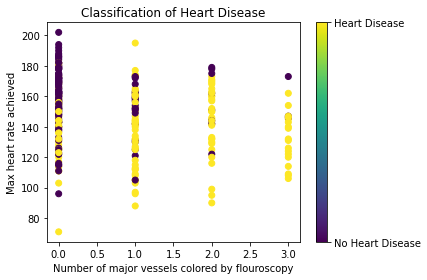

In [ ]:
# The indices of the features that we are plotting
x_index = 'major_vessels'
y_index = 'max_heart_rate'

# This formatter will label the colorbar with the target names
formatter = plt.FuncFormatter(lambda i, *args: df.result[int(i)])

plt.figure(figsize=(6, 4))

plt.scatter(data = df,
            x = x_index,
            y = y_index,
            c = target)

cb=plt.colorbar(ticks=[0, 1], format=formatter)
cb.ax.set_yticklabels(["No Heart Disease","Heart Disease"])
plt.xlabel('Number of major vessels colored by flouroscopy')
plt.ylabel('Max heart rate achieved')
plt.title('Classification of Heart Disease')
plt.tight_layout()
plt.show()

In [ ]:
# Create KNN model
knn = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 8)}

# Use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=3)

# Fit model to data
knn_gscv.fit(df_train[features], df_train[target].values.ravel())

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7])})

In [ ]:
# Check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [ ]:
print('KNN score =', knn_gscv.best_score_)

KNN score = 0.6566872427983539


### Logistic regression

In [ ]:
lr = LogisticRegression(random_state = 0, 
                        max_iter = 1000).fit(df_train[features], 
                        df_train[target].values.ravel())

In [ ]:
print('LR score =', lr.score(df_test[features], df_test[target]))

LR score = 0.8032786885245902


## Model Evaluation: 

In [ ]:
# Here's a rough prediction of distribution of results 
# - fairly evenly split between positive/negative heart disease
df.groupby(target).count()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,old_peak,ST_slope,major_vessels,thalassemia
heart_disease,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164
1,139,139,139,139,139,139,139,139,139,139,139,139,139


#### Predictions for KNN

In [ ]:
# Get probability predictions
prob_pred_knn = knn_gscv.predict_proba(df_test[features])

# Output is 2 cols (T/F)
# - NOTE: value of second is simply (1 minus value of first)
# Extract 'true' values...
prob_pred_true_knn = prob_pred_knn[:,1]

# ...and inject into our dataset
df_test['pred_prob_knn'] = prob_pred_true_knn

#### Predictions for logistic regression

In [ ]:
# Get probability predictions
prob_pred_lr = lr.predict_proba(df_test[features])

# Extract 'true' values...
prob_pred_true_lr = prob_pred_lr[:,1]

# ...and inject into our dataset
df_test['pred_prob_lr'] = prob_pred_true_lr

In [ ]:
df_test.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,old_peak,ST_slope,major_vessels,thalassemia,heart_disease,pred_prob_knn,pred_prob_lr
240,41.0,1.0,2.0,110.0,235.0,0.0,0.0,153.0,0.0,0.0,1.0,0.0,3.0,0,0.666667,0.039765
105,54.0,1.0,2.0,108.0,309.0,0.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0,0,0.333333,0.215303
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,1,0.666667,0.979434
65,60.0,1.0,4.0,145.0,282.0,0.0,2.0,142.0,1.0,2.8,2.0,2.0,7.0,1,0.000000,0.995023
104,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,1,0.333333,0.961039


#### Generate confusion matrix

In [ ]:
def CM(df, cutoff, target, prediction):
      """
      Function to create a Confusion Matrix
      """
      df = df.copy()

      # Capture which prediction probabilities exceeded the 'True' cutoff (have 'heart disease')
      df['pred_true'] = (df[prediction] >= cutoff)

      # Return grouped total counts which chart the 2x2 confusion matrix
      #    (ignore last 'result', we just need a column to focus on for the count)
      
      return df.groupby([target, 'pred_true'])[target].count()

In [ ]:
def CM_values(CM):
    """
    Function to grab each of the individual values of the Confusion Matrix
    This will return the abbreviations for True/False and Positive/Negative combinations and make it easier to do math with them
    It's totally unnecessary and we should have just used a calculator or our heads for this
    """
    TP = CM[1][1]
    FP = CM[1][0]
    TN = CM[0][1]
    FN = CM[0][0]

    return TP, FP, TN, FN

#### Confusion matrix result for KNN 

In [ ]:
# CM for KNN with 0.3 treshold
CM_KNN_3 = CM(df_test, 0.3, target, 'pred_prob_knn')
CM_KNN_3

heart_disease  pred_true
0              False         9
               True         24
1              False         6
               True         22
Name: heart_disease, dtype: int64

In [ ]:
# Get the CM KNN outputs
TP, FP, TN, FN = CM_values(CM_KNN_3)
print(TP, FP, TN, FN)

22 6 24 9


In [ ]:
# ANALYSIS - 0.3 THRESHOLD
print(f"TN = {TN}, TP = {TP} [Correctly identified positive and negative cases] = {TN} + {TP} = {TN + TP}")
print(f"FN = {FN}, FP = {FP} [Inorrectly identified positive and negative cases] = {FN} + {FP} = {FN + FP}")


TN = 24, TP = 22 [Correctly identified positive and negative cases] = 24 + 22 = 46
FN = 9, FP = 6 [Inorrectly identified positive and negative cases] = 9 + 6 = 15


In [ ]:
# CM for KNN with 0.7 threshold 
CM_KNN_7 = CM(df_test, 0.7, target, 'pred_prob_knn')
CM_KNN_7

heart_disease  pred_true
0              False        27
               True          6
1              False        22
               True          6
Name: heart_disease, dtype: int64

In [ ]:
# Get the CM KNN outputs
TP, FP, TN, FN = CM_values(CM_KNN_7)
print(TP, FP, TN, FN)

6 22 6 27


In [ ]:
# ANALYSIS - 0.7 THRESHOLD
print(f"TN = {TN}, TP = {TP} [Correctly identified positive and negative cases] = {TN} + {TP} = {TN + TP}")
print(f"FN = {FN}, FP = {FP} [Inorrectly identified positive and negative cases] = {FN} + {FP} = {FN + FP}")

TN = 6, TP = 6 [Correctly identified positive and negative cases] = 6 + 6 = 12
FN = 27, FP = 22 [Inorrectly identified positive and negative cases] = 27 + 22 = 49


#### Compare the thresholds for KNN:

* 0.3 threshold is better compared to 0.7 because, it predicts correct results for 46 patients, while it incorrectly predicts 15 cases. Whereas, 0.7 correctly predicts 12 cases and incorrectly predicts 49 cases.

* In our case we do not want to incorrectly predict 'False Postives.' Here with 0.3 threshold its - 6 cases but with 0.7 its - 22 cases.

Hence we'l pick `0.3 as the Threshold for KNN`

#### Confusion matrix result for Logistic Regression 

In [ ]:
# CM for LR with 0.3 treshold
CM_LR_3 = CM(df_test, 0.3, target, 'pred_prob_lr')
CM_LR_3

heart_disease  pred_true
0              False        23
               True         10
1              False         4
               True         24
Name: heart_disease, dtype: int64

In [ ]:
# Get the CM LR outputs
TP, FP, TN, FN = CM_values(CM_LR_3)
print(TP, FP, TN, FN)

24 4 10 23


In [ ]:
# ANALYSIS - 0.3 THRESHOLD
print(f"TN = {TN}, TP = {TP} [Correctly identified positive and negative cases] = {TN} + {TP} = {TN + TP}")
print(f"FN = {FN}, FP = {FP} [Inorrectly identified positive and negative cases] = {FN} + {FP} = {FN + FP}")


TN = 10, TP = 24 [Correctly identified positive and negative cases] = 10 + 24 = 34
FN = 23, FP = 4 [Inorrectly identified positive and negative cases] = 23 + 4 = 27


In [ ]:
# CM for LR with 0.7 threshold 
CM_LR_7 = CM(df_test, 0.7, target, 'pred_prob_lr')
CM_LR_7

heart_disease  pred_true
0              False        31
               True          2
1              False         9
               True         19
Name: heart_disease, dtype: int64

In [ ]:
# Get the CM LR outputs
TP, FP, TN, FN = CM_values(CM_LR_7)
print(TP, FP, TN, FN)

19 9 2 31


In [ ]:
# ANALYSIS - 0.7 THRESHOLD
print(f"TN = {TN}, TP = {TP} [Correctly identified positive and negative cases] = {TN} + {TP} = {TN + TP}")
print(f"FN = {FN}, FP = {FP} [Inorrectly identified positive and negative cases] = {FN} + {FP} = {FN + FP}")

TN = 2, TP = 19 [Correctly identified positive and negative cases] = 2 + 19 = 21
FN = 31, FP = 9 [Inorrectly identified positive and negative cases] = 31 + 9 = 40


#### Compare the threshold for LR:

* 0.3 Threshold is better compared to 0.7 because, it predicts correct results for 34 patients, while it incorrectly predicts 27 cases. Whereas, 0.7 predicts correctly 21 cases and incorrectly 40 cases.

* In our case we do not want to incorrectly predict 'False Postives.' Here with 0.3 threshold its - 4 cases but with 0.7 its - 9.

Hence we'll pick `0.3 as the Threshold for LR`.

#### Description:

1. Better performing threshold for KNN is 0.3 with respect to better T/F Positive result prediction
2. Similary 0.3 acts as best for LR model as well with just 4 False Postive cases.
3. We can pick LR as the best model becuase the number of False postives are just 4 compared to KNN which is 7. Before picking the best model let's dive in with other metric's as well.


#### ROC Curves to find the best cutoff

In [ ]:
def RecallPrecision(df, cutoff, prediction, target):
  """
  Utilizing Confusion Matrix calculations for TP, FP, TN, FN, then return: Precision, Recall, and FPR
  """
  df = df.copy()
  
  # Capture which prediction probabilities exceeded the 'True' cutoff - i.e are 'positive'
  df['pred_positive'] = (df[prediction] >= cutoff)
  
  # Collect grouped total counts which chart the 2x2 confusion matrix
  df_grouped = df.groupby([target, 'pred_positive'])[target].count().reset_index(name="count")
  
  # Calculate True/False Positives, and True/False Negatives
  TP = df_grouped[(df_grouped[target]==1) & (df_grouped['pred_positive']==True)]['count'].min()
  FP = df_grouped[(df_grouped[target]==0) & (df_grouped['pred_positive']==True)]['count'].min()
  TN = df_grouped[(df_grouped[target]==0) & (df_grouped['pred_positive']==False)]['count'].min()
  FN = df_grouped[(df_grouped[target]==1) & (df_grouped['pred_positive']==False)]['count'].min()
  
  #print(f'TP: {TP}, FN: {FN}')\

  # Returns: Precision, Recall, False Positive Rate (FPR)
  return TP/(TP+FP), TP/(TP+FN), FP/(TN+FP)

#### ROC curve
- Look for better cutoffs using ROC curve

In [ ]:
# Cutoffs
cutoffs = np.linspace(0.1,0.9,10)
cutoffs

array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ])

#### ROC curve for KNN & LR

In [ ]:
def roc_curve(df, probability, target, cutoffs):
  """
  Calls the RecallPrecision function to generate ROC data
  """
  roc_data = {}
  
  for i in cutoffs:
    _, recall, fpr = RecallPrecision(df, i, probability, target)
    roc_data[fpr] = recall
  
  return roc_data

In [ ]:
# Create ROC curve data for LR and KNN
roc_data_knn = roc_curve(df_test, 'pred_prob_knn', target, cutoffs)
roc_data_lr = roc_curve(df_test, 'pred_prob_lr', target, cutoffs)

In [ ]:
# Dictionary of ROC data containing TP and FP for KNN
roc_data_knn

{0.7272727272727273: 0.7857142857142857,
 0.36363636363636365: 0.5357142857142857,
 0.18181818181818182: 0.21428571428571427}

In [ ]:
# Dictionary of ROC data containing TP and FP for LR
roc_data_lr

{0.6060606060606061: 0.9642857142857143,
 0.45454545454545453: 0.9642857142857143,
 0.36363636363636365: 0.8928571428571429,
 0.2727272727272727: 0.8214285714285714,
 0.21212121212121213: 0.8214285714285714,
 0.18181818181818182: 0.8214285714285714,
 0.09090909090909091: 0.7142857142857143,
 0.06060606060606061: 0.5357142857142857}

Text(0.5, 1.0, 'ROC curve for LR & KNN')

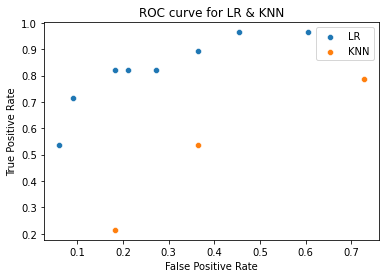

In [ ]:
# Plot both results of the above ROC functions into a single scatterplot

sns.scatterplot(x = roc_data_lr.keys(), 
                y = roc_data_lr.values(), 
                label = 'LR')

sns.scatterplot(x = roc_data_knn.keys(), 
                y = roc_data_knn.values(), 
                label = 'KNN')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LR & KNN')

#### ROC Description

* Our goal with ROC is to find least number of False Postive and more True Positive cases.

* Comparing the multiple cutoffs, it looks like at (0.1, 0.75) predicts fewer False Postive cases and (0.5, 1.0) is the best to predict all correct True Postive cases in LR ROC curve.

* The ROC graph clearly shows that Logistic Regression performs better than KNN.

## Real life decision. 


### Case 1. 
- Correctly identifying a patient earns the hospital 20k. 
- Sending a false positive alarm costs the hospital $20k, 
- while not sending correct verdicts to patients with heart conditions hurts the hospital's long term profitability of 100k. 

### Case 2. 
- [Ceteris paribus](https://en.wikipedia.org/wiki/Ceteris_paribus) to Case 1, 
- what if the lawmaker increased the penalty of false positive alarm to 200k?

### Interpretation

### Case 1. 
1. Correctly identifying a patient earns the hospital 20k.

    - FORMULA: for All correct identifications = TP + TN 
    - EXPLANATION: all `TRUE` results, whether positive or negative are counted as 'correct indentifications,'  for positive cases obviously the hospital is earning money by treating patients, while for negative cases it is the cost saved by NOT needing to try to treat patients only to discover they are healthy and don't have the condition 

2. Sending a false positive alarm costs the hospital $20k, 

    - FORMULA: FP alarm penalty = FP 
    - EXPLANATION: similar to above case of a TN, the hospital has lost money by attempting to treat the patient only to discover they are healthy

3. While not sending correct verdicts to patients with heart conditions hurts the hospital's long term profitability of 100k. 

    - FORMULA: FN 100K lawsuit = FN 
    - EXPLANATION: <font color='red'> NOT </font> correct diagnosis of a heart condition == FN
    - We think this is really badly worded, but it should mean that this is a <font color='red'> FALSE NEGATIVE </font> diagnosis, and that the 100K penalty here is so high, because it is mimicking real life scenario of a patient being misdiagnosed, going home, and dying, and discovering this in the autopsy and the hospital getting sued

#### ANALYSIS

Optimal model = Logistic Regression

Optimal cutoff = 0.1

EXPLANATION:

- The ROC graph clearly shows that ROC performs better than KNN.

- For the cutoff, 0.1 is optimal since our goal is to find the least FP's and FN's, while maximizing our TP's and TN's.


#### CALCULATIONS FOR CASE 1

In [ ]:
# CM for LR with 0.1 treshold
CM_LR_1 = CM(df_test, 0.1, target, 'pred_prob_lr')
CM_LR_1

heart_disease  pred_true
0              False        13
               True         20
1              False         1
               True         27
Name: heart_disease, dtype: int64

In [ ]:
# ANALYSIS - 0.1 THRESHOLD
print(f"TN = {TN}, TP = {TP} [Correctly identified positive and negative cases] = {TN} + {TP} = {TN + TP}")
print(f"FN = {FN}, FP = {FP} [Inorrectly identified positive and negative cases] = {FN} + {FP} = {FN + FP}")

TP = 27, FP = 1, TN = 20, FN = 13
TN = 20, TP = 27 [Correctly identified positive and negative cases] = 20 + 27 = 47
FN = 13, FP = 1 [Inorrectly identified positive and negative cases] = 13 + 1 = 14


In [ ]:
# CALCULATION
print(f"All correct identifications = TP + TN = {TP} + {TN} = {TP + TN} * 20k = {(TP + TN) * 20}k")
print(f"FP alarm penalty = FP = {FP} * -20k = {FP * -20}k")
print(f"FN 100K lawsuit = FN = {FN} * -100k = {FN * -100}k")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Total profit = All correct + FP alarm penalty + FN 100k lawsuit")
print(f"Total profit = ((TP + TN) * 20) + (FP * -20) + (FN * -100) =")
print(f"Total profit = {(TP + TN) * 20} + {FP * -20} + {FN * -100} =")
print(f"Total profit = {((TP + TN) * 20) + (FP * -20) + (FN * -100)}k")

All correct identifications = TP + TN = 27 + 20 = 47 * 20k = 940k
FP alarm penalty = FP = 1 * -20k = -20k
FN 100K lawsuit = FN = 13 * -100k = -1300k
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total profit = All correct + FP alarm penalty + FN 100k lawsuit
Total profit = ((TP + TN) * 20) + (FP * -20) + (FN * -100) =
Total profit = 940 + -20 + -1300 =
Total profit = -380k


#### EXPLANATION

Even with the optimal model (Logistic Regression) and optimal cutoff (0.1) our hospital's finances are going into the negative. Here it looks like `-$380,000` with a patient population of 61 patients in our testing dataset. 

We propose that the hospital should run this model by considering the following concept:
- continue taking patients until approaching the breakeven point of `$0`
- until other hospital revenue has caught up to at least `100k`
- then you can resume taking patients for heart conditions with that buffer of `100k` in case of taking another FN 100K lawsuit penalty
- run recursively (evaluating with each new patient)

### Case 2. 
- [Ceteris paribus](https://en.wikipedia.org/wiki/Ceteris_paribus) to Case 1, 
- what if the lawmaker increased the penalty of false positive alarm to 200k?



#### ANALYSIS

Optimal model = Logistic Regression

Optimal cutoff = 0.1

EXPLANATION:

- The ROC graph clearly shows that ROC performs better than KNN.

- For the cutoff, 0.1 is optimal since our goal is to find the least FP's and FN's, while maximizing our TP's and TN's.

In [ ]:
# CALCULATION
print(f"All correct identifications = TP + TN = {TP} + {TN} = {TP + TN} * 20k = {(TP + TN) * 20}k")
print(f"FP alarm penalty = FP = {FP} * -200k = {FP * -200}k")
print(f"FN 100K lawsuit = FN = {FN} * -100k = {FN * -100}k")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Total profit = All correct + FP alarm penalty + FN 100k lawsuit")
print(f"Total profit = ((TP + TN) * 20) + (FP * -200) + (FN * -100) =")
print(f"Total profit = {(TP + TN) * 20} + {FP * -200} + {FN * -100} =")
print(f"Total profit = {((TP + TN) * 20) + (FP * -200) + (FN * -100)}k")

All correct identifications = TP + TN = 27 + 20 = 47 * 20k = 940k
FP alarm penalty = FP = 1 * -200k = -200k
FN 100K lawsuit = FN = 13 * -100k = -1300k
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total profit = All correct + FP alarm penalty + FN 100k lawsuit
Total profit = ((TP + TN) * 20) + (FP * -200) + (FN * -100) =
Total profit = 940 + -200 + -1300 =
Total profit = -560k


### CASE 2 INTERPRETATION

Rerunning our calculations with the increased FP penalty to `200k` which is a 10 fold increase over the prior `20k` penalty, your hospital is going to easily be in the red all the time... You will never make a profit... You should probably shut down the hospital... But this may qualify you to become a [Critical Access Hospital (CAH)](https://www.ruralhealthinfo.org/topics/critical-access-hospitals) funded by the US Government. But probably the most realistic course of action here would be for the hospital to entirely stop the program at least for heart conditions, until either the AI has improved its accuracy or the penalties have been reduced.